<a href="https://colab.research.google.com/github/pmccthy/ML-playground/blob/main/CNNs/vanilla_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vanilla CNN models**

This notebook is dedicated to building generic CNN models to gain an understanding of how different parameters influence their performance

In [ ]:
# library imports
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.backend import argmax
from tensorflow.keras.utils import to_categorical
import numpy as np
import struct
import matplotlib.pyplot as plt

In [ ]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Training feature matrix has shape (60000, 28, 28)
Test feature matrix has shape (10000, 28, 28)
Training label vector has shape (60000,)
Test label vector has shape (10000,)
5


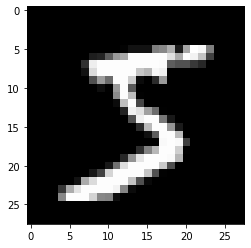

In [ ]:
# sanity checks
print(f'Training feature matrix has shape {np.shape(X_train)}')
print(f'Test feature matrix has shape {np.shape(X_test)}')
print(f'Training label vector has shape {np.shape(y_train)}')
print(f'Test label vector has shape {np.shape(y_test)}')
plt.imshow(X_train[0], 'gray')
print(y_train[0])

In [ ]:
# reshape feature matrices as convolutional layers will expect 4d input
# (last channel is colour channel and equal to 1 because we have greyscale images)
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [ ]:
# one-hot encode target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Next, we will build the model, using 64 convolutional filters for the first layer and 32 for the second

In [ ]:
# build model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


note, the output shape of each layer is 2 smaller than the previous layer: this is because we are convolving with a 3x3 kernel which cannot be centered on pixels in the outside rows or columns, hence the size of the output is essentially trimmed by one pixel on each side

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 172s 91ms/step - loss: 0.2325 - accuracy: 0.9511 - val_loss: 0.1013 - val_accuracy: 0.9688
Epoch 2/3
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0728 - accuracy: 0.9774 - val_loss: 0.0891 - val_accuracy: 0.9742
Epoch 3/3
1875/1875 [==============================] - 175s 93ms/step - loss: 0.0507 - accuracy: 0.9840 - val_loss: 0.0860 - val_accuracy: 0.9769


In [ ]:
sample_predictions = argmax(model.predict(X_test[:4]))
ground_truth = argmax(y_test[:4])

In [ ]:
print(f'Predicted classes: {sample_predictions}')
print(f'Ground truth: {ground_truth}')

Predicted classes: [7 2 1 0]
Ground truth: [7 2 1 0]
